In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                   'score':[5,4,3,4,np.nan]})
df

sex  score
0    M    5.0
1    F    4.0
2  NaN    3.0
3    M    4.0
4    F    NaN

In [3]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [4]:
pd.isna(df)

sex  score
0  False  False
1  False  False
2   True  False
3  False  False
4  False   True

In [5]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [6]:
df.dropna(subset=['score'])

sex  score
0    M    5.0
1    F    4.0
2  NaN    3.0
3    M    4.0

In [7]:
df.dropna(subset=['sex', 'score'])

sex  score
0   M    5.0
1   F    4.0
3   M    4.0

In [8]:
df.dropna()

sex  score
0   M    5.0
1   F    4.0
3   M    4.0

In [9]:
# 결측치 대체하기

In [10]:
exam = pd.read_csv("Data2/exam.csv")
exam

id  nclass  math  english  science
0    1       1    50       98       50
1    2       1    60       97       60
2    3       1    45       86       78
3    4       1    30       98       58
4    5       2    25       80       65
5    6       2    50       89       98
6    7       2    80       90       45
7    8       2    90       78       25
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65
16  17       5    65       68       98
17  18       5    80       78       90
18  19       5    89       68       87
19  20       5    78       83       58

In [11]:
exam.loc[ [2,7,14], ['math'] ]

math
2     45
7     90
14    75

In [12]:
exam.loc[ [2,7,14], ['math'] ] = np.nan
exam

id  nclass  math  english  science
0    1       1  50.0       98       50
1    2       1  60.0       97       60
2    3       1   NaN       86       78
3    4       1  30.0       98       58
4    5       2  25.0       80       65
5    6       2  50.0       89       98
6    7       2  80.0       90       45
7    8       2   NaN       78       25
8    9       3  20.0       98       15
9   10       3  50.0       98       45
10  11       3  65.0       65       65
11  12       3  45.0       85       32
12  13       4  46.0       98       65
13  14       4  48.0       87       12
14  15       4   NaN       56       78
15  16       4  58.0       98       65
16  17       5  65.0       68       98
17  18       5  80.0       78       90
18  19       5  89.0       68       87
19  20       5  78.0       83       58

In [13]:
exam['math'].mean()

55.23529411764706

In [14]:
exam['math'] = exam['math'].fillna(55)
exam

id  nclass  math  english  science
0    1       1  50.0       98       50
1    2       1  60.0       97       60
2    3       1  55.0       86       78
3    4       1  30.0       98       58
4    5       2  25.0       80       65
5    6       2  50.0       89       98
6    7       2  80.0       90       45
7    8       2  55.0       78       25
8    9       3  20.0       98       15
9   10       3  50.0       98       45
10  11       3  65.0       65       65
11  12       3  45.0       85       32
12  13       4  46.0       98       65
13  14       4  48.0       87       12
14  15       4  55.0       56       78
15  16       4  58.0       98       65
16  17       5  65.0       68       98
17  18       5  80.0       78       90
18  19       5  89.0       68       87
19  20       5  78.0       83       58

In [15]:
exam['math'].isna().sum()

0

In [16]:
# 이상치 정제

In [17]:
df = pd.DataFrame({'sex':[1,2,1,3,2,1],
                   'score':[5,4,3,4,2,6]})
df

sex  score
0    1      5
1    2      4
2    1      3
3    3      4
4    2      2
5    1      6

In [18]:
df['sex'].value_counts()

1    3
2    2
3    1
Name: sex, dtype: int64

In [19]:
df['score'].value_counts(sort=False)

5    1
4    2
3    1
2    1
6    1
Name: score, dtype: int64

In [20]:
# sex 가 3이면 NaN
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

sex  score
0  1.0      5
1  2.0      4
2  1.0      3
3  NaN      4
4  2.0      2
5  1.0      6

In [21]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

sex  score
0  1.0    5.0
1  2.0    4.0
2  1.0    3.0
3  NaN    4.0
4  2.0    2.0
5  1.0    NaN

In [22]:
df.dropna(subset=['sex', 'score']) \
    .groupby('sex') \
    .agg(mean_score = ('score', 'mean'))

mean_score
sex            
1.0         4.0
2.0         3.0

In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
mpg = pd.read_csv("Data2/mpg.csv")
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

    category  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

Outliers:  [array([44, 44, 41], dtype=object)]
Boxes:  [array([18., 18., 27., 27., 18.])]
Medians:  [array([24., 24.])]
Whiskers:  [array([18., 12.]), array([27., 37.])]


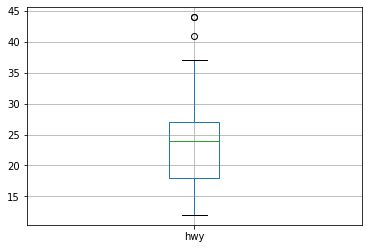

In [26]:
# 구글 : matplotlib boxplot return values
_, bp = pd.DataFrame.boxplot(mpg[['hwy']], return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

print("Outliers: ", outliers)
print("Boxes: ", boxes)
print("Medians: ", medians)
print("Whiskers: ", whiskers)

array([0])

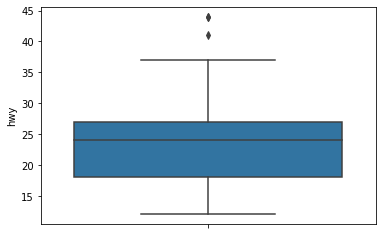

In [ ]:
# box_plot = sns.boxplot(x = df['ur_data'], y = df['ur_data2'])

# medians = df.groupby(['ur_data'])['ur_data2'].median()
# vertical_offset = df['ur_data2'].median() * 0.05

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='x-small',color='w',weight='semibold')

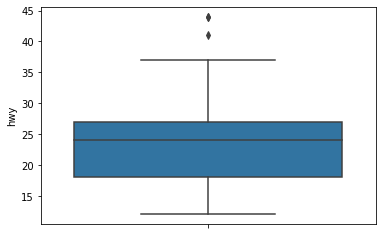

In [27]:
sns.boxplot(data=mpg, y='hwy');

[Text(0, 0, '')]

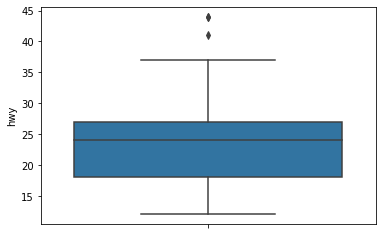

In [28]:
sns.boxplot(data=mpg, y='hwy').get_xticklabels()

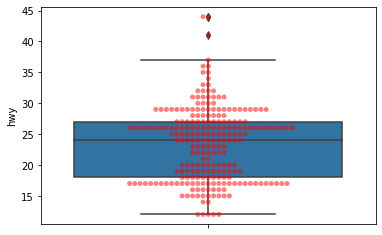

In [29]:
sns.boxplot(data=mpg, y='hwy');
sns.swarmplot(data=mpg, y='hwy', color='red', alpha=0.5);

In [30]:
pct25 = mpg['hwy'].quantile(.25) # 1사분위
pct25

18.0

In [31]:
pct75 = mpg['hwy'].quantile(.75) # 3사분위
pct75

27.0

In [32]:
# IQR(Inter Quarntile Range, 사분위범위) : 3사분위 - 1사분위
iqr = pct75 - pct25
iqr

9.0

In [33]:
pct25 - (1.5 * iqr) # 하한

4.5

In [34]:
pct75 + (1.5 * iqr) # 상한

40.5

In [35]:
# 하한값(4.5) ~ 상한값(40.5) 벗어나면 NaN
mpg['hwy'] = np.where( (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'] )

In [36]:
mpg['hwy'].isna().sum()

3

In [37]:
mpg.dropna(subset=['hwy']) \
    .groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))

mean_hwy
drv           
4    19.174757
f    27.728155
r    21.000000

In [38]:
# end